<a href="https://www.kaggle.com/code/brianlaurenszzz/regression-resale-flat-prices-in-singapore?scriptVersionId=102081029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/resale-flat-prices-in-singapore/flat-prices.csv


In [2]:
df = pd.read_csv('/kaggle/input/resale-flat-prices-in-singapore/flat-prices.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [3]:
print(f'{df.shape[1]} column and {df.shape[0]} rows')

10 column and 287196 rows


In [4]:
print(df.info())
print('-'*50)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
--------------------------------------------------
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_ar

# Pre-porcessing

In [5]:
df2 = df.drop(['month','lease_commence_date'], axis=1)
#df2 = df.copy()
df2.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,9000
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,6000
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,8000
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,6000
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,47200


In [6]:
#Convert categorical variable into numerical 
#from sklearn.preprocessing import LabelEncoder,StandardScaler

#label = LabelEncoder()


#df1['town'] = label.fit_transform(df1['town'])
#df1['flat_type'] = label.fit_transform(df1['flat_type'])
#df1['street_name'] = label.fit_transform(df1['street_name'])
#df1['storey_range'] = label.fit_transform(df1['storey_range'])
#df1['flat_model'] = label.fit_transform(df1['flat_model'])

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   town            287196 non-null  object 
 1   flat_type       287196 non-null  object 
 2   block           287196 non-null  object 
 3   street_name     287196 non-null  object 
 4   storey_range    287196 non-null  object 
 5   floor_area_sqm  287196 non-null  float64
 6   flat_model      287196 non-null  object 
 7   resale_price    287196 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 17.5+ MB


In [8]:
kolom = ['town','block',
         'street_name','storey_range','flat_model']
#Mengubah menjadi Numerik
for col in kolom:
  df2[col] = df2[col].astype('category').cat.codes
  #df2[col] = df2[col].astype('int')
    
df2['floor_area_sqm'] = df2['floor_area_sqm'].astype('int')

In [9]:
df2['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [10]:
df2['flat_type'] = df2['flat_type'].replace('1 ROOM',1)
df2['flat_type'] = df2['flat_type'].replace('2 ROOM',2)
df2['flat_type'] = df2['flat_type'].replace('3 ROOM',3)
df2['flat_type'] = df2['flat_type'].replace('4 ROOM',4)
df2['flat_type'] = df2['flat_type'].replace('5 ROOM',5)
df2['flat_type'] = df2['flat_type'].replace('EXECUTIVE',6)
df2['flat_type'] = df2['flat_type'].replace('MULTI GENERATION',7)
df2['flat_type'] = df2['flat_type'].astype('int')

In [11]:
df2.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price
0,0,1,269,4,3,31,2,9000
1,0,1,269,4,1,31,2,6000
2,0,1,269,4,3,31,2,8000
3,0,1,269,4,2,31,2,6000
4,0,3,147,4,1,73,8,47200


# EDA

In [12]:
def plot_cat_var(df, var):
    df = df.copy()
    print(f'Total of {var}: ',df[var].nunique())
    #print(f'{var} Laptop: ', df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} berdasarkan Harga Jual')
    sns.barplot(
        x = var,
        y = 'resale_price',
        data = df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('resale_price')
    plt.show()

In [13]:
cat_vars = ['town','flat_type','flat_model']

Total of town:  26


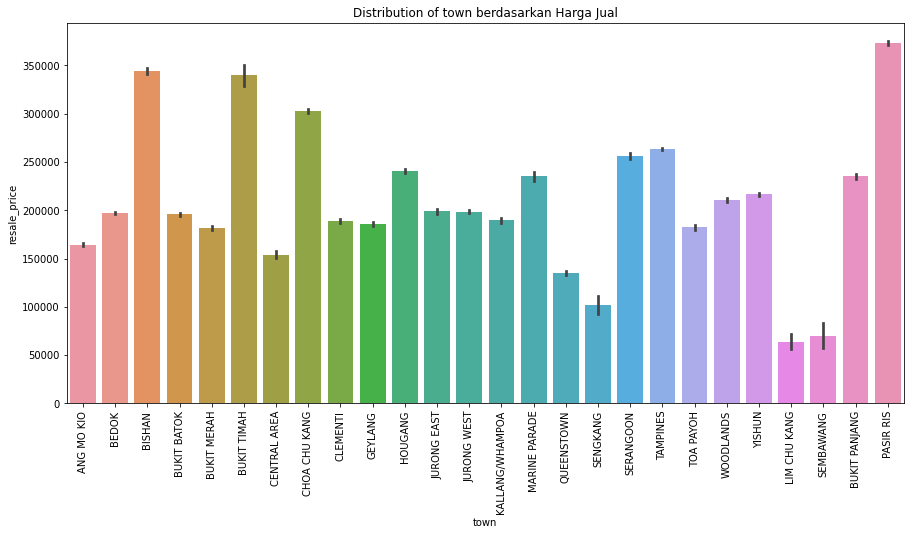

Total of flat_type:  7


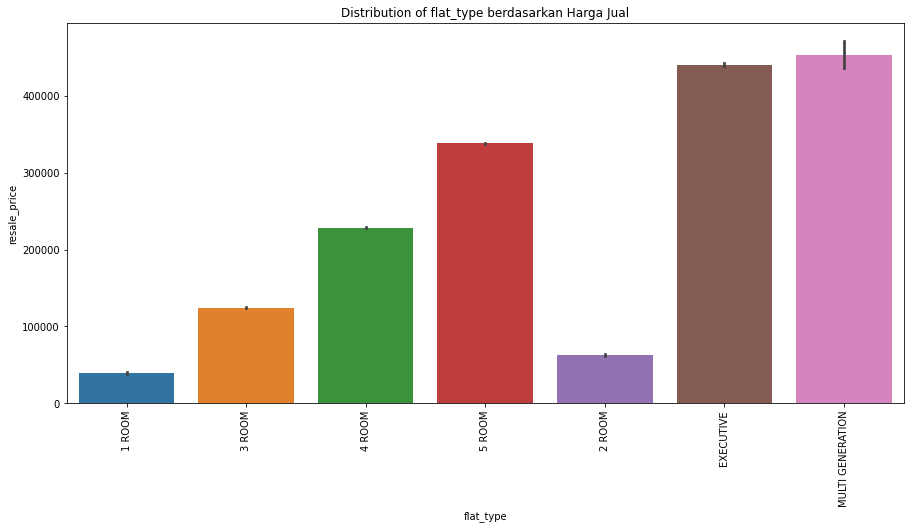

Total of flat_model:  13


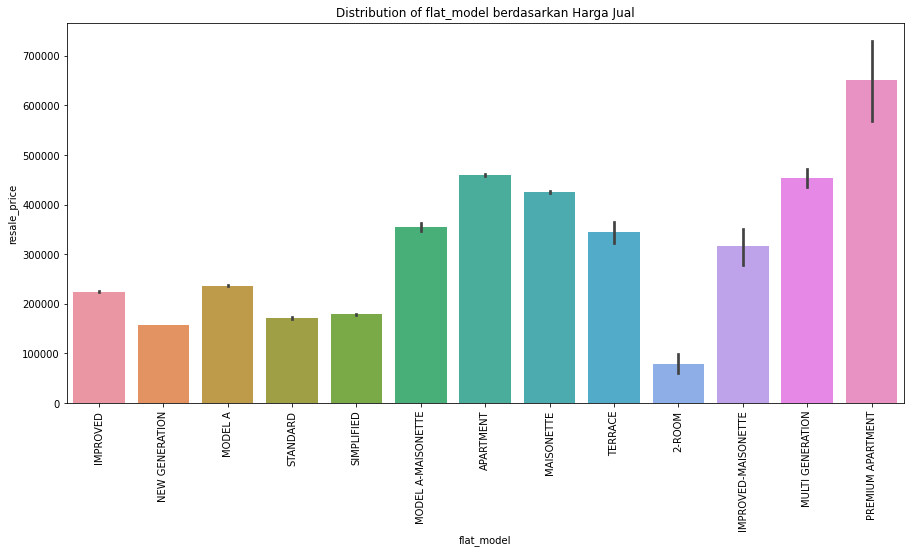

In [14]:
for var in cat_vars:
    plot_cat_var(df, var)

<AxesSubplot:>

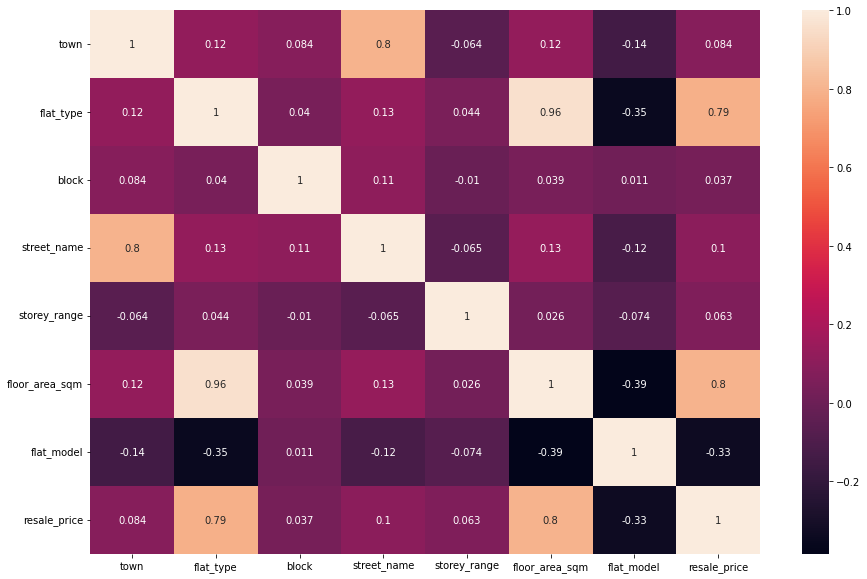

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True)

## **Model** 

In [16]:
#Splitting Data

train, test = train_test_split(df2, test_size=0.1, random_state=0)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 258476
No. of testing examples: 28720


In [17]:
x_train=train.drop('resale_price',axis=1)
y_train=train[['resale_price']]

x_test=test.drop('resale_price',axis=1)
y_test=test[['resale_price']]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((258476, 7), (258476, 1), (28720, 7), (28720, 1))

In [18]:
x_train.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model
70520,1,3,293,31,4,73,8
34453,0,3,280,4,3,88,8


In [19]:
y_train.head(2)

,resale_price
70520,116000
34453,56700


# Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr_score = lr.score(x_test, y_test)
lr_score

0.6467598230926064

In [22]:
y_pred = lr.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[207661.09361382 116712.30058617 131082.7036147  332911.90731329
 192601.24122381]
[ 80000 138200 138000 325000 210000]


In [23]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))

Score Mean Squared Error      = 5812523600.691041
Score Root Mean Squared Error = 76239.90818915669
Score Mean Absolute Error     = 58114.0848630777
Score R2                      = 0.6467598230926064


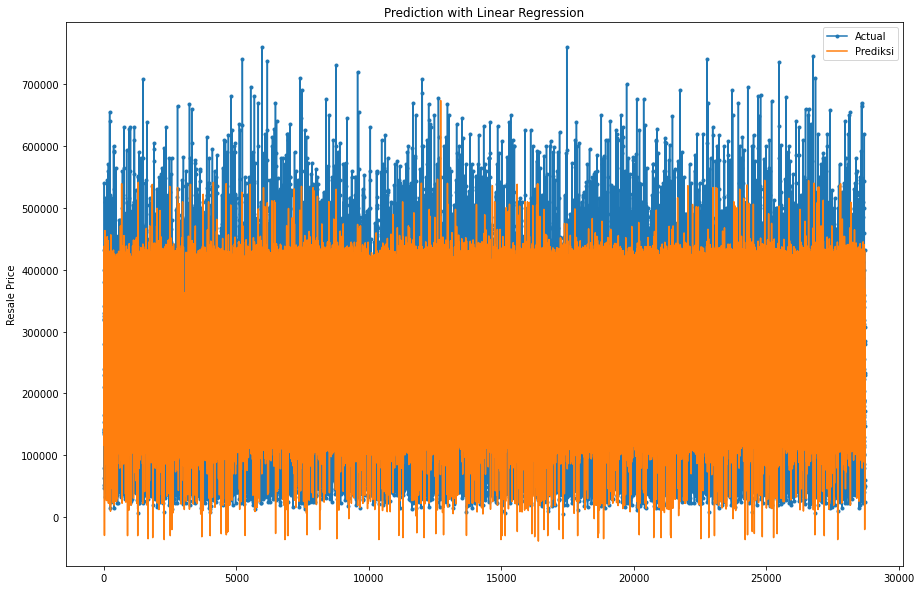

In [24]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Resale Price')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [25]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Actual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = y_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(4)

,Actual,Linear Regression
0,80000,207661.0
1,138200,116712.0
2,138000,131083.0
3,325000,332912.0


# Decision Tree

In [26]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
dt_score = dt.score(x_test, y_test)
dt_score

0.6049473452923009

In [28]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[165000.         106111.11111111 100687.5        216888.88888889
 183200.        ]
[ 80000 138200 138000 325000 210000]


In [29]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))

Score Mean Squared Error      = 6500542772.647694
Score Root Mean Squared Error = 80625.94354578241
Score Mean Absolute Error     = 60351.76752125468
Score R2                      = 0.6049473452923009


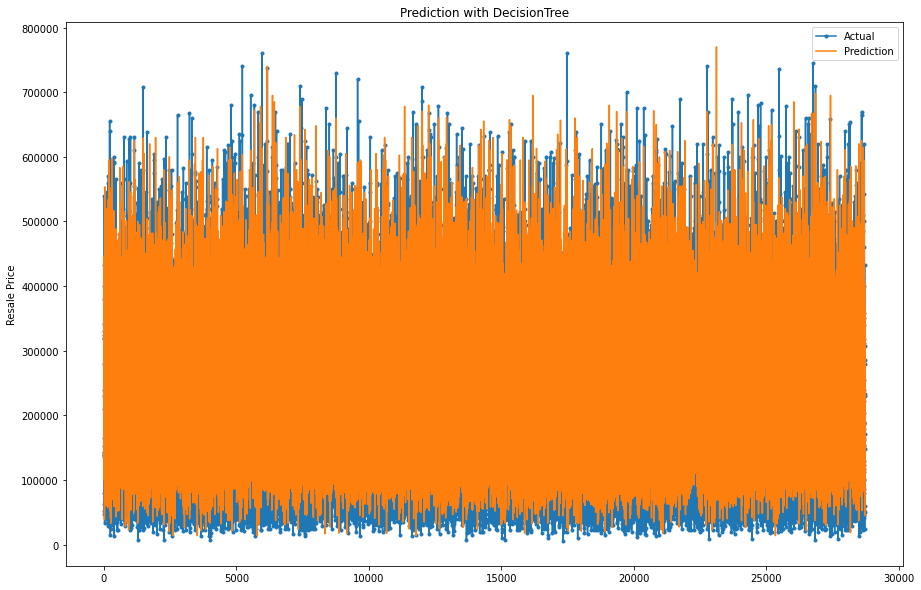

In [30]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Resale Price')
plt.title('Prediction with DecisionTree')
plt.legend()
plt.show()

In [31]:
hasil_prediksi['DecisionTree'] = y_pred.flatten()
hasil_prediksi['DecisionTree'] = hasil_prediksi['DecisionTree'].round(0)
hasil_prediksi.head(4)

,Actual,Linear Regression,DecisionTree
0,80000,207661.0,165000.0
1,138200,116712.0,106111.0
2,138000,131083.0,100688.0
3,325000,332912.0,216889.0


# Random Forest

In [32]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [33]:
rf_score = rf.score(x_test, y_test)
rf_score

0.7028505151733856

In [34]:
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[175712.55714567 118294.84656378 122216.20684127 294980.99729651
 192165.73771531]
[ 80000 138200 138000 325000 210000]


In [35]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(rf_mse))
print('Score Root Mean Squared Error = {}'.format(rf_rmse))
print('Score Mean Absolute Error     = {}'.format(rf_mae))
print('Score R2                      = {}'.format(rf_r))

Score Mean Squared Error      = 4889558171.466676
Score Root Mean Squared Error = 69925.375733468
Score Mean Absolute Error     = 53404.25940210582
Score R2                      = 0.7028505151733856


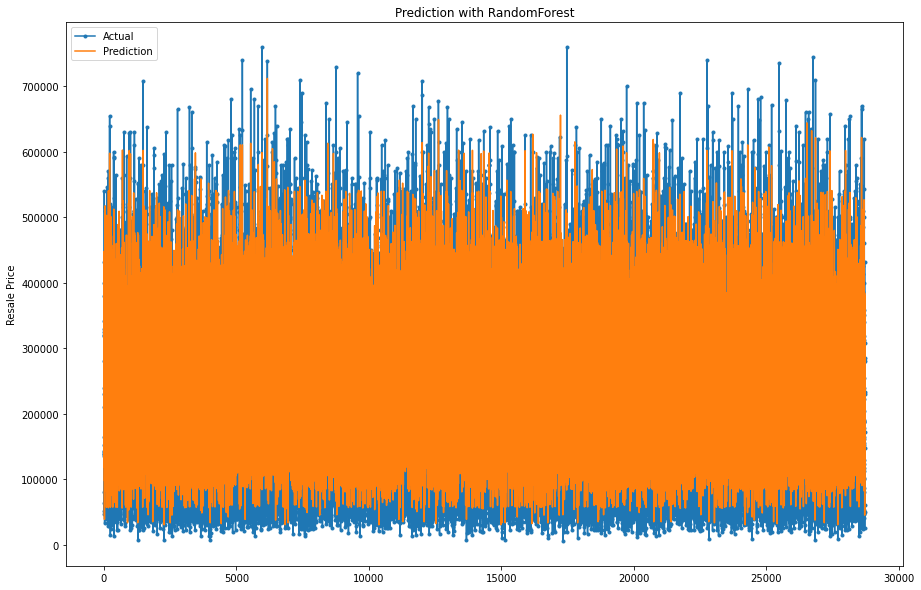

In [36]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Resale Price')
plt.title('Prediction with RandomForest')
plt.legend()
plt.show()

In [37]:
hasil_prediksi['RandomForest'] = y_pred.flatten()
hasil_prediksi['RandomForest'] = hasil_prediksi['RandomForest'].round(0)
hasil_prediksi.head(4)

,Actual,Linear Regression,DecisionTree,RandomForest
0,80000,207661.0,165000.0,175713.0
1,138200,116712.0,106111.0,118295.0
2,138000,131083.0,100688.0,122216.0
3,325000,332912.0,216889.0,294981.0
